In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

import seaborn as sns
sns.set_style('white')

In [2]:
import os
from tqdm import tqdm
from glob import glob
import pickle
from collections import defaultdict

import skimage
import numpy as np
import pandas as pd
import scipy
import numpy_indexed as npi

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics


import cv2

In [3]:
fn_mapping = {
    'masks': lambda name: name.replace('RGB', 'GTI'),
    'dems': lambda name: name.replace('RGB', 'DSM'),
    'dtms': lambda name: name.replace('RGB', 'DTM')
}

In [4]:
DATA_PATH = '/home/vessemer/Projects/GIS/data/TRAINING/'

In [5]:
MASK_PATH = '/home/vessemer/Projects/GIS/data/truth-training.txt'

In [6]:
pic_name = "TAM_Tile_004_GTI.tif"

In [7]:
pic = cv2.imread(DATA_PATH+pic_name, -1)

In [8]:
pic

In [9]:
import os

In [32]:
file_names = []
for folder in tqdm(os.listdir(DATA_PATH)):
    for filename in tqdm(os.listdir(DATA_PATH + "/" + folder)):
        if 'instances' in filename:
            file_names.append(DATA_PATH + folder + "/" + filename)
        continue
    else:
        continue

100%|██████████| 10/10 [00:00<00:00, 168.00it/s]


In [33]:
file_names

['/home/vessemer/Projects/GIS/data/TRAINING/YTS6DUZYSW5KADN1/YTS6DUZYSW5KADN1_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/E60M2WMELMJVAPBB/E60M2WMELMJVAPBB_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/E1QZENNLNLCXBKPN/E1QZENNLNLCXBKPN_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/AZ74029PBGFI0291/AZ74029PBGFI0291_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/LJJ5AQ6GYW6L2M8D/LJJ5AQ6GYW6L2M8D_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/SQ77SFLTIREZWKAX/SQ77SFLTIREZWKAX_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/A14OK5A65AR5AOST/A14OK5A65AR5AOST_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/T4ZUFU91883CRMQ3/T4ZUFU91883CRMQ3_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/FOCNEZJJ9UP6IPIC/FOCNEZJJ9UP6IPIC_instances.png',
 '/home/vessemer/Projects/GIS/data/TRAINING/8B7JP60TYSMLOTJO/8B7JP60TYSMLOTJO_instances.png']

In [34]:
for i in tqdm(file_names):
    fname = i
    print(fname)
    pic = cv2.imread(fname, -1)
    msk = create_mask(pic, 20)
    cv2.imwrite(i.replace("instances", "MB"), msk)

  0%|          | 0/10 [00:00<?, ?it/s]

/home/vessemer/Projects/GIS/data/TRAINING/YTS6DUZYSW5KADN1/YTS6DUZYSW5KADN1_instances.png


/home/vessemer/anaconda3/envs/cxr/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)
 10%|█         | 1/10 [00:52<07:52, 52.50s/it]

/home/vessemer/Projects/GIS/data/TRAINING/E60M2WMELMJVAPBB/E60M2WMELMJVAPBB_instances.png


 20%|██        | 2/10 [01:35<06:20, 47.54s/it]

/home/vessemer/Projects/GIS/data/TRAINING/E1QZENNLNLCXBKPN/E1QZENNLNLCXBKPN_instances.png


 30%|███       | 3/10 [02:29<05:49, 49.99s/it]

/home/vessemer/Projects/GIS/data/TRAINING/AZ74029PBGFI0291/AZ74029PBGFI0291_instances.png


 40%|████      | 4/10 [03:25<05:08, 51.44s/it]

/home/vessemer/Projects/GIS/data/TRAINING/LJJ5AQ6GYW6L2M8D/LJJ5AQ6GYW6L2M8D_instances.png


 50%|█████     | 5/10 [04:13<04:13, 50.70s/it]

/home/vessemer/Projects/GIS/data/TRAINING/SQ77SFLTIREZWKAX/SQ77SFLTIREZWKAX_instances.png


 60%|██████    | 6/10 [05:04<03:23, 50.75s/it]

/home/vessemer/Projects/GIS/data/TRAINING/A14OK5A65AR5AOST/A14OK5A65AR5AOST_instances.png


 70%|███████   | 7/10 [05:49<02:29, 49.93s/it]

/home/vessemer/Projects/GIS/data/TRAINING/T4ZUFU91883CRMQ3/T4ZUFU91883CRMQ3_instances.png


 80%|████████  | 8/10 [06:33<01:38, 49.17s/it]

/home/vessemer/Projects/GIS/data/TRAINING/FOCNEZJJ9UP6IPIC/FOCNEZJJ9UP6IPIC_instances.png


 90%|█████████ | 9/10 [07:20<00:48, 48.98s/it]

/home/vessemer/Projects/GIS/data/TRAINING/8B7JP60TYSMLOTJO/8B7JP60TYSMLOTJO_instances.png


100%|██████████| 10/10 [08:10<00:00, 49.01s/it]


In [16]:
pic = cv2.imread(file_names[0], -1)

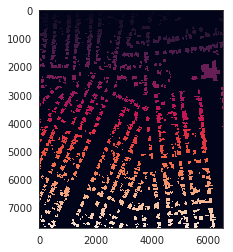

In [17]:
plt.imshow(pic)

In [14]:
from utils import UrbanDataset
%load_ext autoreload
%autoreload 2

In [47]:
uds = UrbanDataset(file_names, DATA_PATH)

In [48]:
len(uds) 

174

In [49]:
uds[0]['mask']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

### transform masks

In [11]:
import sys
from os import path, mkdir, listdir
import numpy as np
np.random.seed(1)
import random
random.seed(1)
import cv2
import timeit
from tqdm import tqdm
from skimage import measure
from multiprocessing import Pool
from skimage.morphology import square, dilation, watershed

In [12]:
from scipy.ndimage import label

In [23]:

def create_mask(labels, dilation_size):
    # labels = cv2.imread(path.join(labels_folder, '{0}.tif'.format(img_id)), cv2.IMREAD_UNCHANGED)
    
    tmp = dilation(labels > 0, square(dilation_size))    
    tmp2 = watershed(tmp, labels, mask=tmp, watershed_line=True) > 0
    tmp = tmp ^ tmp2
    tmp = dilation(tmp, square(7))
    msk = (255 * tmp).astype('uint8')
    
    props = measure.regionprops(labels)
    msk0 = 255 * (labels > 0)
    msk0 = msk0.astype('uint8')
    
    msk1 = np.zeros_like(labels, dtype='bool')
    
    max_area = np.max([p.area for p in props])
    
    for y0 in range(labels.shape[0]):
        for x0 in range(labels.shape[1]):
            if not tmp[y0, x0]:
                continue
            if labels[y0, x0] == 0:
                if max_area > 8000: # 4000
                    sz = 16 # 6
                else:
                    sz = 9 # 3
            else:
                sz = 9 # 3
                if props[labels[y0, x0] - 1].area <600: # 300
                    sz = 3 # 1
                elif props[labels[y0, x0] - 1].area < 4000: # 2000
                    sz = 6 # 2
            uniq = np.unique(labels[max(0, y0-sz):min(labels.shape[0], y0+sz+1), max(0, x0-sz):min(labels.shape[1], x0+sz+1)])
            if len(uniq[uniq > 0]) > 1:
                msk1[y0, x0] = True
                msk0[y0, x0] = 0
    
    msk1 = 255 * msk1
    msk1 = msk1.astype('uint8')
    
    msk2 = np.zeros_like(labels, dtype='uint8')
    msk = np.stack((msk0, msk1, msk2))
    msk = np.rollaxis(msk, 0, 3)
    
    return msk

In [24]:
pic_2d = pic.sum(axis=-1)

In [25]:
fat_msk = create_mask(pic, 20)
slim_msk = create_mask(pic, 9)

/home/vessemer/anaconda3/envs/cxr/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


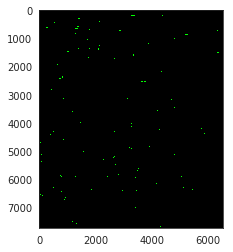

In [69]:
plt.imshow(fat_msk - slim_msk)

In [19]:
fat_msk.shape

(7737, 6525, 3)

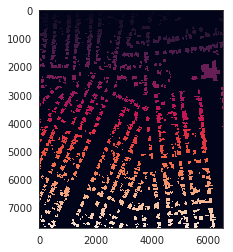

In [61]:
plt.imshow(pic)

In [28]:
fat_mask_part = fat_msk.sum(axis=-1)
slim_mask_part = slim_mask.sum(axis=-1)

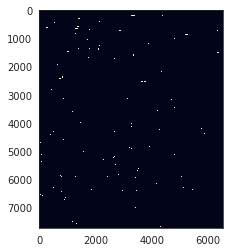

In [62]:
plt.imshow(fat_mask_part - slim_mask_part)

In [41]:
fat_lb, fat_num_feeatures = label(fat_mask_part)

In [42]:
slim_lb, slim_num_feeatures = label(slim_mask_part)

In [43]:
fat_num_feeatures

813

In [44]:
slim_num_feeatures

648

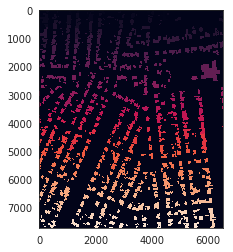

In [45]:
plt.imshow(fat_lb)

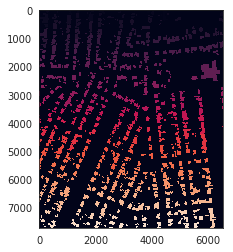

In [46]:
plt.imshow(slim_lb)

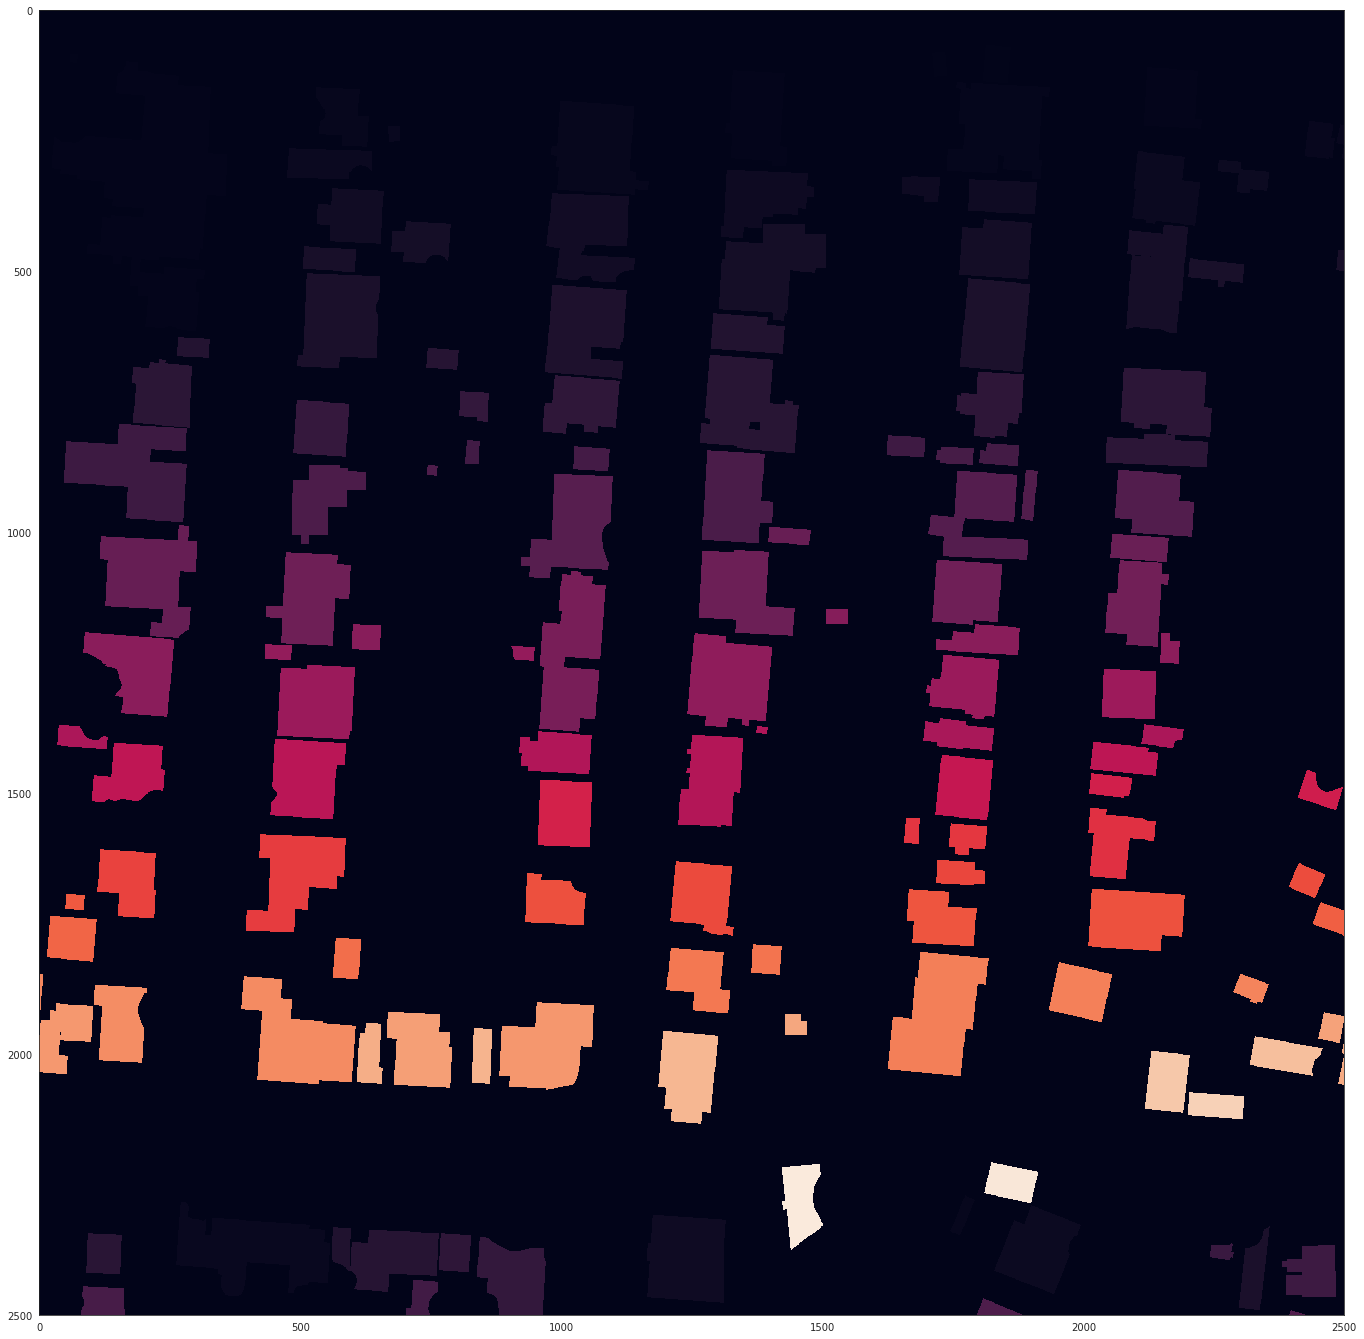

In [26]:
plt.figure(figsize=(24, 24))
plt.imshow(pic[:2500, :2500] ** 2)
plt.show()

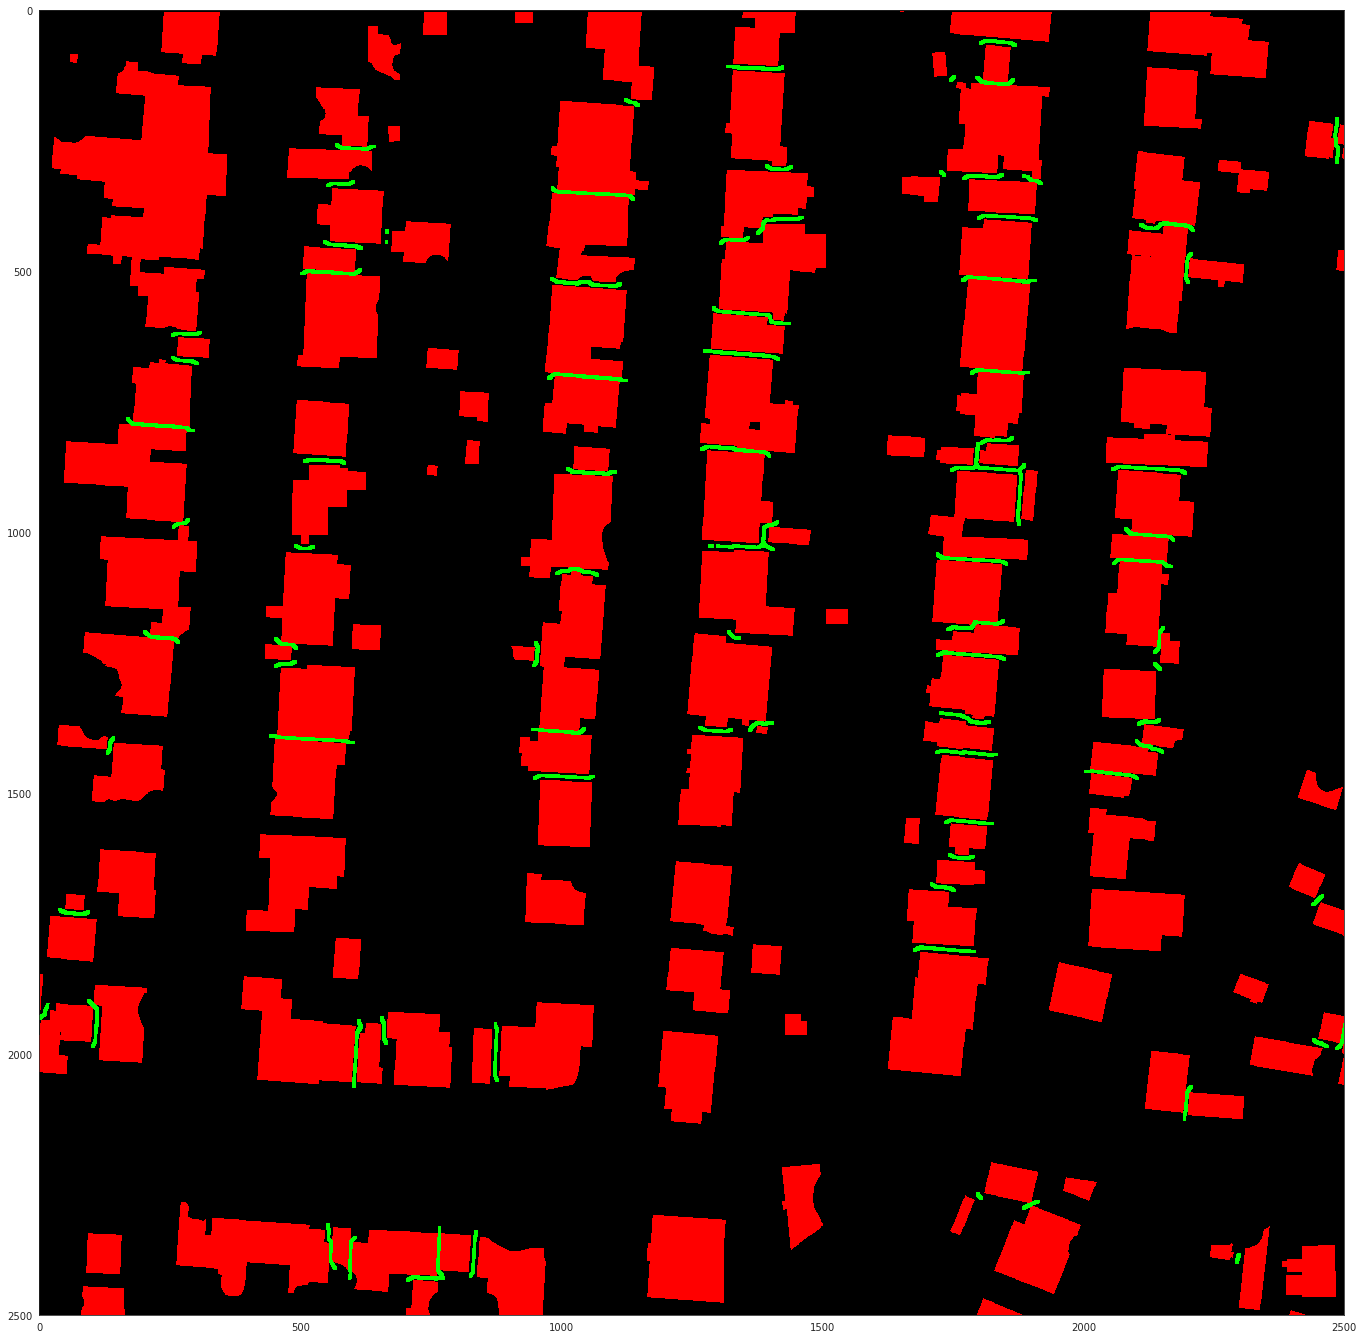

In [27]:
plt.figure(figsize=(24, 24))
plt.imshow(fat_msk[:2500, :2500])
plt.show()